# Предобработка данных для анализа влияния типа банковского продукта на клиентское недовольство

**Исследовательский вопрос:** Как тип банковского продукта влияет на клиентское недовольство?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

In [7]:
# Загрузка данных
df = pd.read_csv("bank_reviews_preprocessed.csv")
print(f"Общее количество отзывов: {len(df)}")
print(f"\nПервые строки данных:")
df.head()

Общее количество отзывов: 34356

Первые строки данных:


,record_id,client_id,review_datetime,finish_datetime,review_source,product_group,product_group_token,product_detail,product_detail_token,review_mark,review_emotion,sentiment_label,dissatisfaction_bucket,is_dissatisfied,reason,review_theme,subtheme,solution_flag,age_segment,segment_name,review_month,response_time_hours,review_text
0,1,fb30834209a9c7f60612c64b82c75ffa,2025-02-18 15:41:00,2025-02-18 16:56:49.353,banki.ru,кредитные карты,кредитные карты,кредитная карта,кредитная карта,1,0,negative,dissatisfied,1,Не определено,тарифы и условия,консультация по продукту,проблема решена,Молодежь,Доходные,2025-02,1.26,"Непрозрачные условия, скрытые комсисии. Почему..."
1,2,f1f8eff66eaf2289f61deec744871d6b,2025-07-08 07:40:43,2025-07-08 10:29:04.740,banki.ru,депозитные продукты,депозитные продукты,дебетовая карта,дебетовая карта,5,1,positive,satisfied,0,Не определено,мп/лк/терминал,установка/обновление приложения,не указано,Взрослые,Малодоходные,2025-07,2.81,Я уже очень давно пользуюсь услугами Тбанка и ...
2,3,7a436100b113ce78c8a7a02974521a16,2025-02-13 21:38:40,2025-02-14 08:04:44.643,banki.ru,депозитные продукты,депозитные продукты,дебетовая карта,дебетовая карта,5,1,positive,satisfied,0,Не определено,кэшбек,корректировка кэшбека,не указано,Сеньоры,Доходные,2025-02,10.43,Выбрал на текущий месяц повышенный кэшбек на к...
3,4,e60a8b542d1ffdfd980e0cd330f9d382,2025-02-24 17:48:47,2025-02-24 18:34:06.695,banki.ru,депозитные продукты,депозитные продукты,дебетовая карта,дебетовая карта,5,1,positive,satisfied,0,Не определено,тарифы и условия,консультация по продукту,не указано,Подростки,Малодоходные,2025-02,0.76,Я пользуюсь услугами Т-банка уже несколько мес...
4,5,060308edb7cfda819b61a123511148f0,2025-02-17 12:14:00,2025-02-17 14:58:26.542,banki.ru,депозитные продукты,депозитные продукты,дебетовая карта,дебетовая карта,1,0,negative,dissatisfied,1,Не определено,мп/лк/терминал,отображается неверная информация,проблема решена,Взрослые,Малодоходные,2025-02,2.74,Примерно 15.02.2025 в приложении Т-Банка появи...


In [8]:
# Базовая информация о данных
print("=== ИНФОРМАЦИЯ О ДАННЫХ ===\n")
print(f"Форма данных: {df.shape}")
print(f"\nТипы данных:")
print(df.dtypes)
print(f"\nПропущенные значения:")
print(df.isnull().sum())
print(f"\nОсновная статистика по недовольству:")
print(df['is_dissatisfied'].value_counts())
print(f"\nДоля недовольных клиентов: {df['is_dissatisfied'].mean():.2%}")

=== ИНФОРМАЦИЯ О ДАННЫХ ===

Форма данных: (34356, 23)

Типы данных:
record_id                   int64
client_id                  object
review_datetime            object
finish_datetime            object
review_source              object
product_group              object
product_group_token        object
product_detail             object
product_detail_token       object
review_mark                 int64
review_emotion              int64
sentiment_label            object
dissatisfaction_bucket     object
is_dissatisfied             int64
reason                     object
review_theme               object
subtheme                   object
solution_flag              object
age_segment                object
segment_name               object
review_month               object
response_time_hours       float64
review_text                object
dtype: object

Пропущенные значения:
record_id                    0
client_id                    0
review_datetime              0
finish_datetime    

In [9]:
# Анализ типов продуктов
print("=== АНАЛИЗ ТИПОВ ПРОДУКТОВ ===\n")
print(f"Уникальные группы продуктов:")
print(df['product_group'].value_counts())
print(f"\nВсего уникальных групп: {df['product_group'].nunique()}")
print(f"\nВсего уникальных продуктов (детально): {df['product_detail'].nunique()}")

=== АНАЛИЗ ТИПОВ ПРОДУКТОВ ===

Уникальные группы продуктов:
product_group
депозитные продукты           18870
премиальные сервисы            6736
кредитные карты                3081
автокредит                     1140
нефинансовые продукты          1027
прочие продукты                 697
поддержка сотрудников           663
кредит наличными                534
ипотека                         405
кредит наличными под залог      244
кредит на покупку               214
sme                             180
страховая                       130
семейный банк                    96
mobile                           83
кубышка                          68
инвестиции                       68
Не определено                    58
долями                           27
рефинансирование                 21
депозиты                         11
кредиты                           3
Name: count, dtype: int64

Всего уникальных групп: 22

Всего уникальных продуктов (детально): 67


In [10]:
# Создание агрегированной таблицы: недовольство по типу продукта
product_dissatisfaction = df.groupby('product_group').agg({
    'is_dissatisfied': ['count', 'sum', 'mean'],
    'review_mark': 'mean',
    'response_time_hours': 'mean'
}).round(4)

# Переименование столбцов для удобства
product_dissatisfaction.columns = ['total_reviews', 'dissatisfied_count', 'dissatisfied_rate', 'avg_review_mark', 'avg_response_time']

# Сортировка по уровню недовольства
product_dissatisfaction = product_dissatisfaction.sort_values('dissatisfied_rate', ascending=False)

print("=== НЕДОВОЛЬСТВО ПО ТИПУ ПРОДУКТА ===\n")
product_dissatisfaction

=== НЕДОВОЛЬСТВО ПО ТИПУ ПРОДУКТА ===



,total_reviews,dissatisfied_count,dissatisfied_rate,avg_review_mark,avg_response_time
product_group,,,,,
кредиты,3,3,1.0000,1.0000,NaN
ипотека,405,383,0.9457,1.2000,48.2074
депозиты,11,10,0.9091,1.1818,NaN
кредит наличными под залог,244,217,0.8893,1.3770,36.1595
кредит на покупку,214,185,0.8645,1.4766,24.8666
кредит наличными,534,454,0.8502,1.5562,37.3815
кубышка,68,57,0.8382,1.6324,21.5263
прочие продукты,697,574,0.8235,1.6126,21.4909
автокредит,1140,892,0.7825,1.8623,47.1534


In [11]:
# Детальный анализ по конкретным продуктам (product_detail)
product_detail_dissatisfaction = df.groupby(['product_group', 'product_detail']).agg({
    'is_dissatisfied': ['count', 'sum', 'mean'],
    'review_mark': 'mean'
}).round(4)

product_detail_dissatisfaction.columns = ['total_reviews', 'dissatisfied_count', 'dissatisfied_rate', 'avg_review_mark']
product_detail_dissatisfaction = product_detail_dissatisfaction.sort_values('dissatisfied_rate', ascending=False)

# Фильтруем продукты с минимум 10 отзывами для статистической значимости
product_detail_filtered = product_detail_dissatisfaction[product_detail_dissatisfaction['total_reviews'] >= 10]

print("=== ТОП-20 ПРОДУКТОВ С НАИБОЛЬШИМ НЕДОВОЛЬСТВОМ (минимум 10 отзывов) ===\n")
product_detail_filtered.head(20)

=== ТОП-20 ПРОДУКТОВ С НАИБОЛЬШИМ НЕДОВОЛЬСТВОМ (минимум 10 отзывов) ===



,,total_reviews,dissatisfied_count,dissatisfied_rate,avg_review_mark
product_group,product_detail,,,,
кредит наличными,образовательный кредит,20,20,1.0000,1.0000
автокредит,рефинансирование автокредита,21,21,1.0000,1.0952
ипотека,рефинансирование ипотеки,85,83,0.9765,1.0941
автокредит,не определено,287,280,0.9756,1.0906
прочие продукты,collection,155,151,0.9742,1.0968
ипотека,не определено,212,204,0.9623,1.1274
нефинансовые продукты,выгода,25,23,0.9200,1.4400
ипотека,ипотека на вторичном рынке,93,85,0.9140,1.3226
кредит наличными под залог,кредит наличными под залог недвижимости,174,158,0.9080,1.2931


In [12]:
# Создание сводной таблицы для кросс-табуляции
pivot_table = pd.crosstab(
    df['product_group'], 
    df['is_dissatisfied'],
    margins=True,
    margins_name='Всего'
)
pivot_table.columns = ['Удовлетворен', 'Недоволен', 'Всего']

print("=== СВОДНАЯ ТАБЛИЦА: ПРОДУКТЫ vs НЕДОВОЛЬСТВО (абсолютные значения) ===\n")
print(pivot_table)

# Процентное распределение
pivot_table_pct = pd.crosstab(
    df['product_group'], 
    df['is_dissatisfied'],
    normalize='index'
) * 100
pivot_table_pct.columns = ['Удовлетворен (%)', 'Недоволен (%)']
pivot_table_pct = pivot_table_pct.round(2)

print("\n\n=== СВОДНАЯ ТАБЛИЦА: ПРОДУКТЫ vs НЕДОВОЛЬСТВО (проценты) ===\n")
pivot_table_pct.sort_values('Недоволен (%)', ascending=False)

=== СВОДНАЯ ТАБЛИЦА: ПРОДУКТЫ vs НЕДОВОЛЬСТВО (абсолютные значения) ===

                            Удовлетворен  Недоволен  Всего
product_group                                             
mobile                                70         13     83
sme                                  157         23    180
Не определено                         13         45     58
автокредит                           248        892   1140
депозитные продукты                 9069       9801  18870
депозиты                               1         10     11
долями                                 7         20     27
инвестиции                            52         16     68
ипотека                               22        383    405
кредит на покупку                     29        185    214
кредит наличными                      80        454    534
кредит наличными под залог            27        217    244
кредитные карты                      937       2144   3081
кредиты                                0  

,Удовлетворен (%),Недоволен (%)
product_group,,
кредиты,0.00,100.00
ипотека,5.43,94.57
депозиты,9.09,90.91
кредит наличными под залог,11.07,88.93
кредит на покупку,13.55,86.45
кредит наличными,14.98,85.02
кубышка,16.18,83.82
прочие продукты,17.65,82.35
автокредит,21.75,78.25


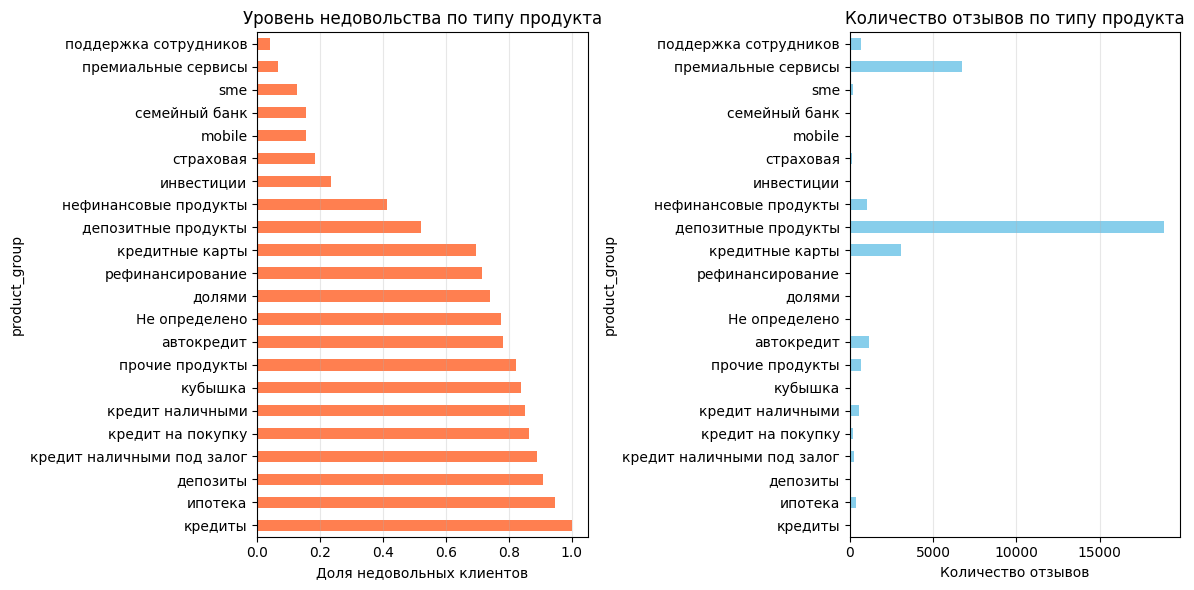

In [13]:
# Визуализация: график недовольства по продуктам
plt.figure(figsize=(12, 6))

# График 1: Доля недовольных клиентов
plt.subplot(1, 2, 1)
product_dissatisfaction['dissatisfied_rate'].plot(kind='barh', color='coral')
plt.xlabel('Доля недовольных клиентов')
plt.title('Уровень недовольства по типу продукта')
plt.grid(axis='x', alpha=0.3)

# График 2: Количество отзывов по продуктам
plt.subplot(1, 2, 2)
product_dissatisfaction['total_reviews'].plot(kind='barh', color='skyblue')
plt.xlabel('Количество отзывов')
plt.title('Количество отзывов по типу продукта')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Статистический тест: Chi-Square для проверки значимости связи
from scipy.stats import chi2_contingency

# Создаем контингенционную таблицу (без итогов)
contingency_table = pd.crosstab(df['product_group'], df['is_dissatisfied'])

# Проводим тест хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("=== СТАТИСТИЧЕСКИЙ ТЕСТ: CHI-SQUARE ===\n")
print(f"Chi-Square статистика: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Степени свободы: {dof}")
print(f"\nИнтерпретация:")
if p_value < 0.05:
    print("✓ Связь между типом продукта и недовольством СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)")
    print("  Тип продукта ВЛИЯЕТ на уровень недовольства клиентов")
else:
    print("✗ Связь между типом продукта и недовольством НЕ значима (p >= 0.05)")
    print("  Тип продукта НЕ влияет на уровень недовольства клиентов")

=== СТАТИСТИЧЕСКИЙ ТЕСТ: CHI-SQUARE ===

Chi-Square статистика: 7803.5493
P-value: 0.000000
Степени свободы: 21

Интерпретация:
✓ Связь между типом продукта и недовольством СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)
  Тип продукта ВЛИЯЕТ на уровень недовольства клиентов


In [15]:
# Анализ дополнительных факторов по продуктам
print("=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ПО ПРОДУКТАМ ===\n")

# Анализ причин недовольства по продуктам
print("ТОП-3 причины недовольства по каждому типу продукта:\n")
for product in df['product_group'].unique():
    dissatisfied_reviews = df[(df['product_group'] == product) & (df['is_dissatisfied'] == 1)]
    if len(dissatisfied_reviews) > 0:
        top_reasons = dissatisfied_reviews['reason'].value_counts().head(3)
        print(f"\n{product}:")
        for reason, count in top_reasons.items():
            pct = (count / len(dissatisfied_reviews)) * 100
            print(f"  • {reason}: {count} ({pct:.1f}%)")

=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ПО ПРОДУКТАМ ===

ТОП-3 причины недовольства по каждому типу продукта:


кредитные карты:
  • Не определено: 1833 (85.5%)
  • финансовая информация: 36 (1.7%)
  • заявки: 30 (1.4%)

депозитные продукты:
  • Не определено: 8273 (84.4%)
  • блокировка/разблокировка карты: 132 (1.3%)
  • ограничение операций: 93 (0.9%)

кредит наличными под залог:
  • Не определено: 170 (78.3%)
  • заявки: 9 (4.1%)
  • купленные долги: 8 (3.7%)

поддержка сотрудников:
  • Не определено: 7 (26.9%)
  • повторное обращение: 2 (7.7%)
  • нефинансовые услуги: 2 (7.7%)

кредит наличными:
  • Не определено: 370 (81.5%)
  • заявки: 16 (3.5%)
  • отсрочка платежа и реструктуризация долга: 9 (2.0%)

премиальные сервисы:
  • Не определено: 262 (58.2%)
  • подключение сервиса premium: 35 (7.8%)
  • подписки: 20 (4.4%)

автокредит:
  • Не определено: 618 (69.3%)
  • финансовая информация: 76 (8.5%)
  • общая информация: 43 (4.8%)

нефинансовые продукты:
  • Не определено: 343 (80.7%)
  • нефи

In [16]:
# Экспорт предобработанных данных для дальнейшего анализа
# 1. Агрегация по продуктам
product_dissatisfaction.to_csv('product_dissatisfaction_analysis.csv')

# 2. Детальная таблица по конкретным продуктам
product_detail_filtered.to_csv('product_detail_dissatisfaction_analysis.csv')

# 3. Сводная таблица
pivot_table.to_csv('product_crosstab_absolute.csv')
pivot_table_pct.to_csv('product_crosstab_percentage.csv')

print("=== ФАЙЛЫ СОХРАНЕНЫ ===")
print("✓ product_dissatisfaction_analysis.csv - основная таблица по группам продуктов")
print("✓ product_detail_dissatisfaction_analysis.csv - детальная таблица по конкретным продуктам")
print("✓ product_crosstab_absolute.csv - кросс-таблица (абсолютные значения)")
print("✓ product_crosstab_percentage.csv - кросс-таблица (проценты)")

=== ФАЙЛЫ СОХРАНЕНЫ ===
✓ product_dissatisfaction_analysis.csv - основная таблица по группам продуктов
✓ product_detail_dissatisfaction_analysis.csv - детальная таблица по конкретным продуктам
✓ product_crosstab_absolute.csv - кросс-таблица (абсолютные значения)
✓ product_crosstab_percentage.csv - кросс-таблица (проценты)


## Краткие выводы

**Подготовленные данные для тестирования гипотезы:**

1. **product_dissatisfaction** - основная таблица с агрегированными метриками по группам продуктов:
   - Общее количество отзывов
   - Количество недовольных клиентов
   - Доля недовольных клиентов
   - Средняя оценка
   - Среднее время ответа

2. **product_detail_dissatisfaction** - детальная таблица по конкретным продуктам (с фильтром >= 10 отзывов)

3. **Сводные таблицы (pivot)** - кросс-табуляция для анализа связи между типом продукта и недовольством

4. **Статистический тест Chi-Square** - для проверки значимости связи между переменными

**Для формулировки гипотез используйте:**
- H0 (нулевая): Тип банковского продукта НЕ влияет на клиентское недовольство
- H1 (альтернативная): Тип банковского продукта ВЛИЯЕТ на клиентское недовольство

Критерий: p-value < 0.05 для отклонения нулевой гипотезы

## Ключевые находки из анализа

### 📊 Самые проблемные продукты (высокое недовольство):
1. **Кредиты** - 100% недовольных
2. **Ипотека** - 94.57% недовольных
3. **Кредит наличными под залог** - 88.93% недовольных
4. **Кредит на покупку** - 86.45% недовольных
5. **Кредит наличными** - 85.02% недовольных

### ✅ Самые успешные продукты (низкое недовольство):
1. **Поддержка сотрудников** - 3.92% недовольных
2. **Премиальные сервисы** - 6.68% недовольных
3. **SME** - 12.78% недовольных
4. **Семейный банк** - 15.62% недовольных
5. **Mobile** - 15.66% недовольных

### 🔬 Статистический вывод:
**Chi-Square тест показал p-value = 0.000000 (< 0.05)**
✅ **Тип банковского продукта статистически значимо влияет на клиентское недовольство**

### 💡 Инсайты:
- Кредитные продукты имеют в 10+ раз больше недовольства, чем сервисные продукты
- Депозитные продукты имеют средний уровень недовольства (~52%)
- Премиальные сервисы и поддержка сотрудников показывают лучшие результаты